### project PPT -
1.CANVA LINK https://www.canva.com/design/DAGwgKWd8R4/QRY6rkow7jOLxa_LjJCYpg/edit?utm_content=DAGwgKWd8R4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton


In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model selection & evaluation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# XGBoost
from xgboost import XGBRegressor


#DATA PREPROCESSING

In [ ]:
df=pd.read_csv('Insurance.csv')
print(df.shape)

(1338, 7)


In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Count duplicates
print("Duplicates found:", df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)
df.shape

Duplicates found: 1


(1337, 7)

In [ ]:
print("info:\n",df.info())
print("-"*100)
print("head:\n",df.head())
print("-"*100)
print("describe:\n",df.describe)

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB
info:
 None
----------------------------------------------------------------------------------------------------
head:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  nort

In [ ]:
#checking unique value to convert variables to numerical
for col in df:
  print(f"{col} = {df[col].unique()}")

age = [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex = ['female' 'male']
bmi = [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.

In [ ]:
df.rename(columns={'sex':'gender'},inplace=True)

/tmp/ipython-input-1575561136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'sex':'gender'},inplace=True)


In [ ]:
binary_map = {
    'female': 0, 'male': 1,'yes': 1, 'no': 0}

binary_cols = ['gender','smoker']

for col in binary_cols:
    df[col] = df[col].map(binary_map)

/tmp/ipython-input-1892415623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(binary_map)
/tmp/ipython-input-1892415623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(binary_map)


In [ ]:
data_dummies = pd.get_dummies(df['region'], prefix='region')
data_dummies = data_dummies.astype(int)
data_dummies

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [ ]:
df = pd.concat([df, data_dummies], axis=1)

In [ ]:
df= df.drop('region', axis=1)
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


#EDA

<Axes: >

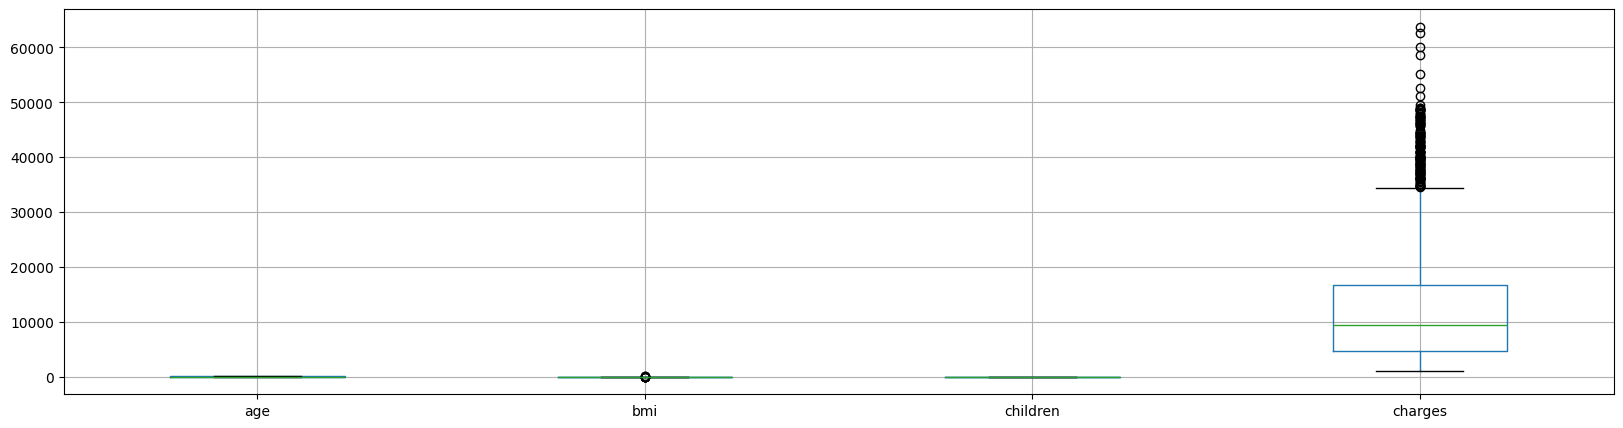

In [ ]:
df.boxplot(figsize=(20,5))

In [ ]:
print(df.dtypes)

age                   int64
gender                int64
bmi                 float64
children              int64
smoker                int64
charges             float64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object


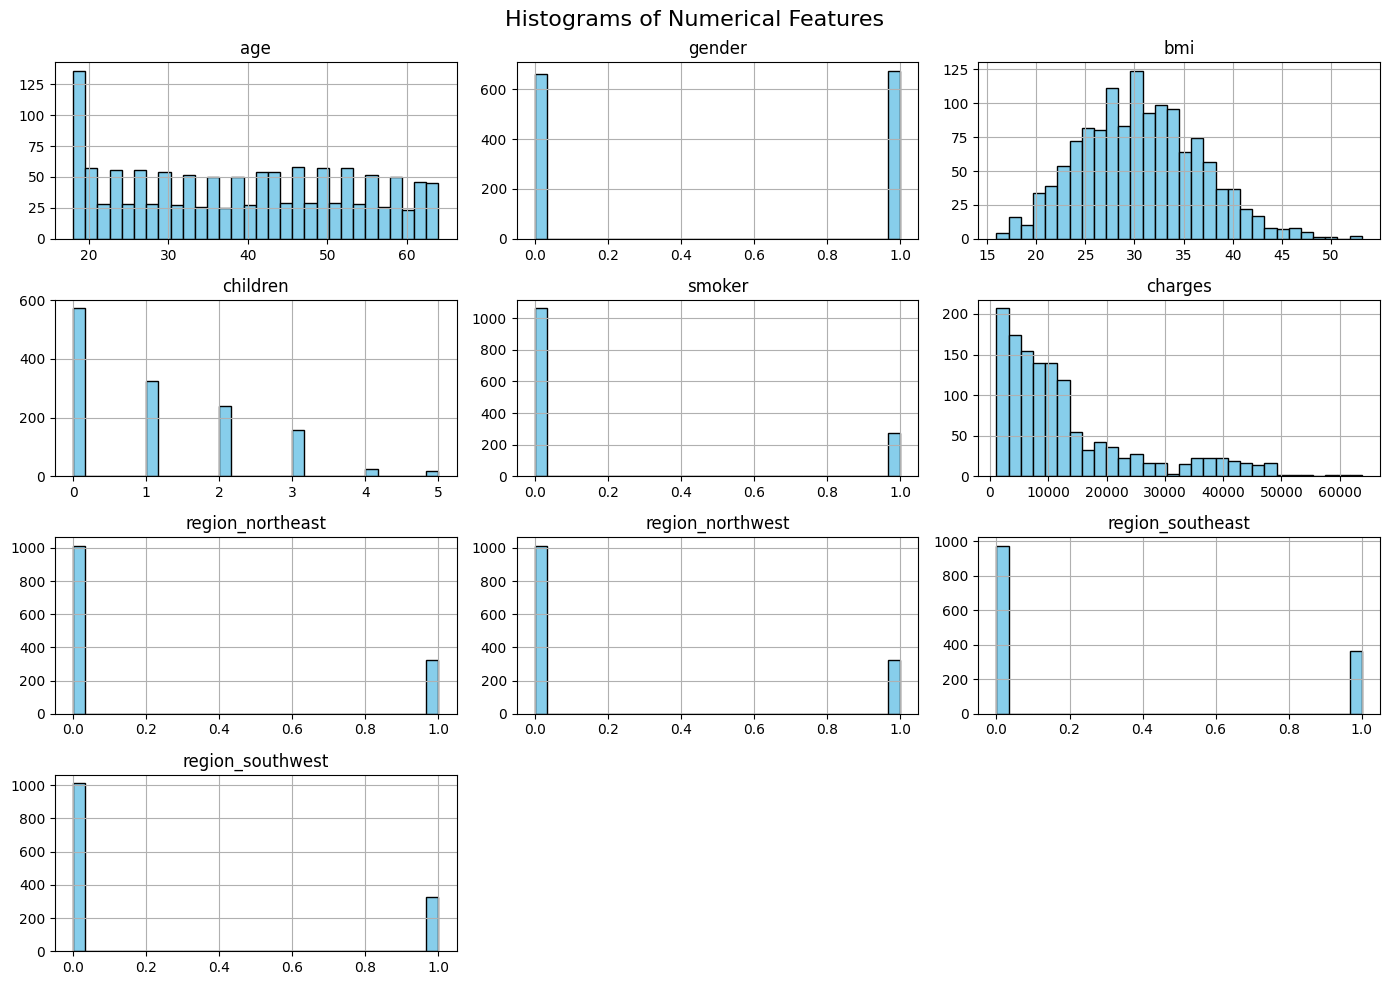

In [ ]:
# 5. Numerical Feature Distributions
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_features].hist(bins=30, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

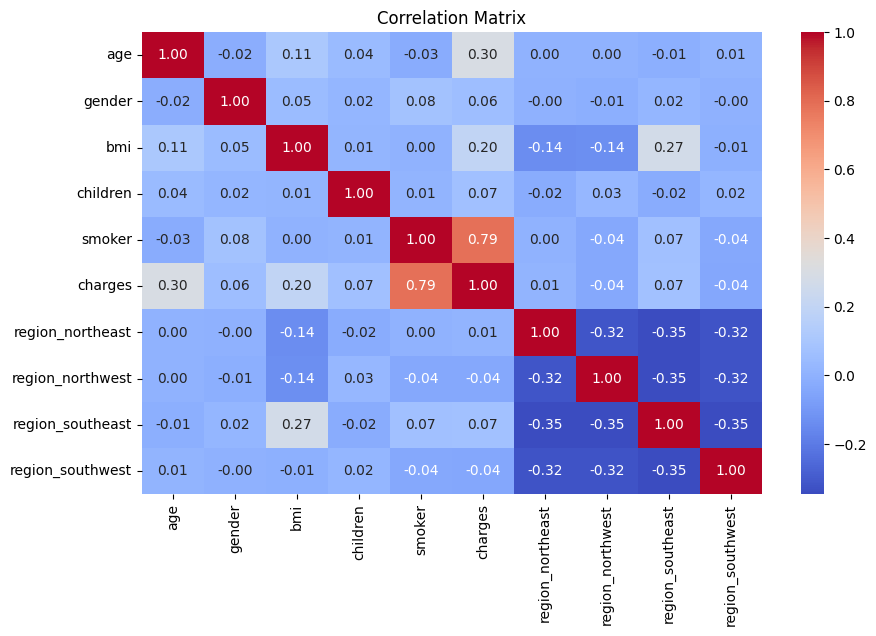

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   gender            1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int64  
 7   region_northwest  1337 non-null   int64  
 8   region_southeast  1337 non-null   int64  
 9   region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 114.9 KB
None


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

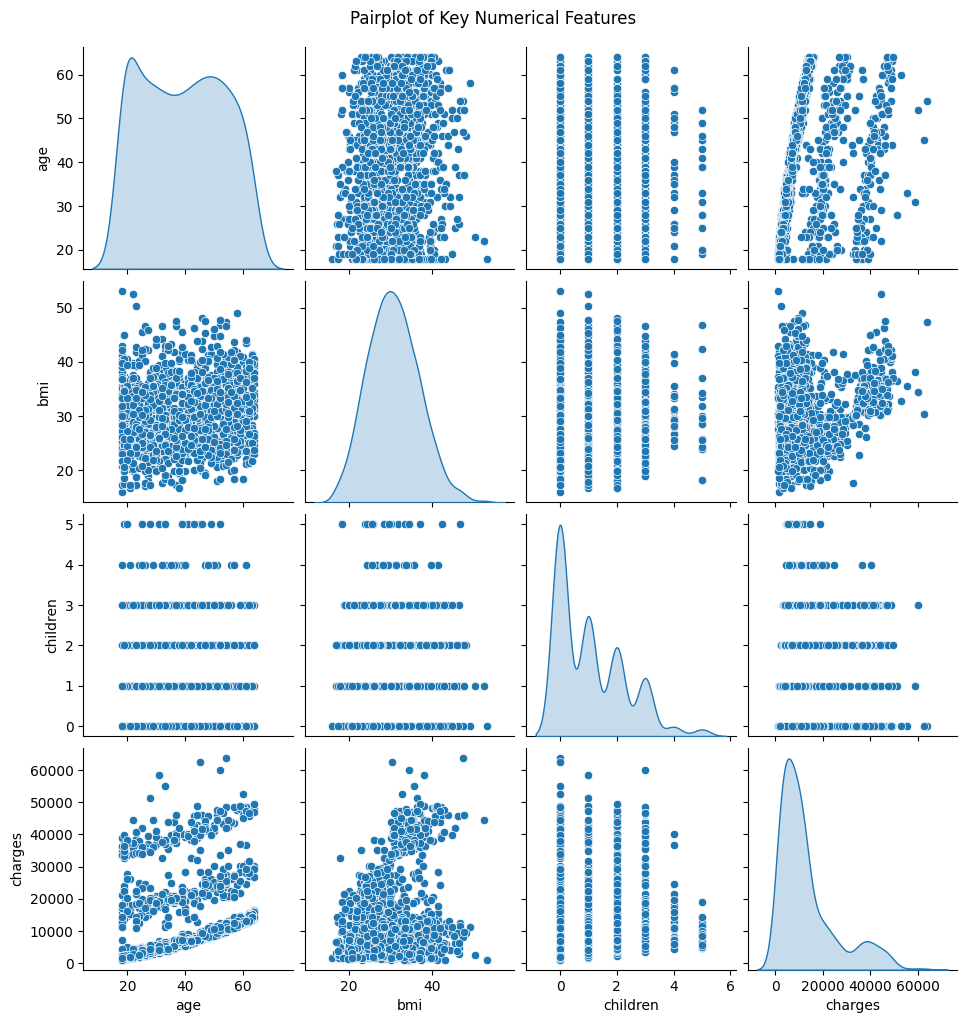

In [ ]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()


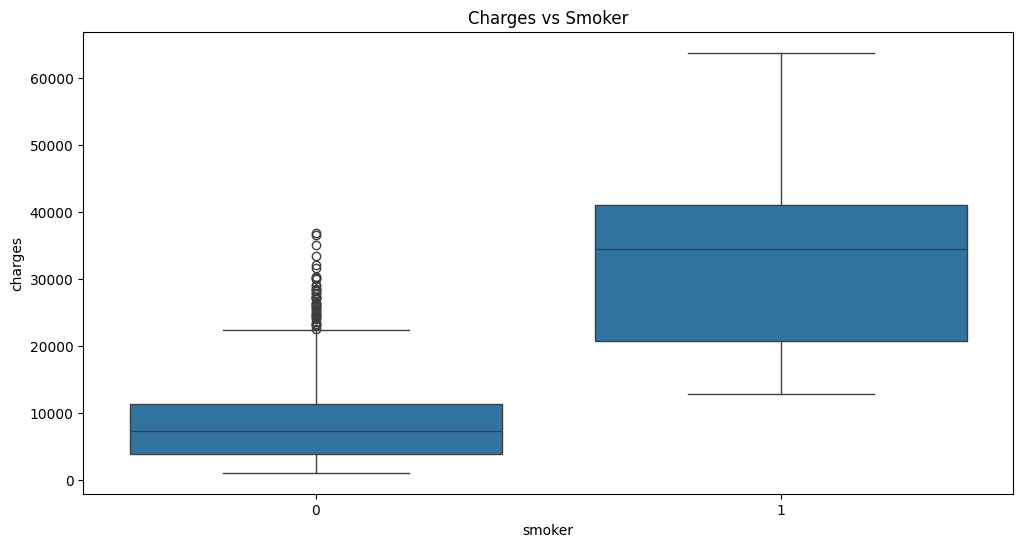

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges vs Smoker")
plt.show()



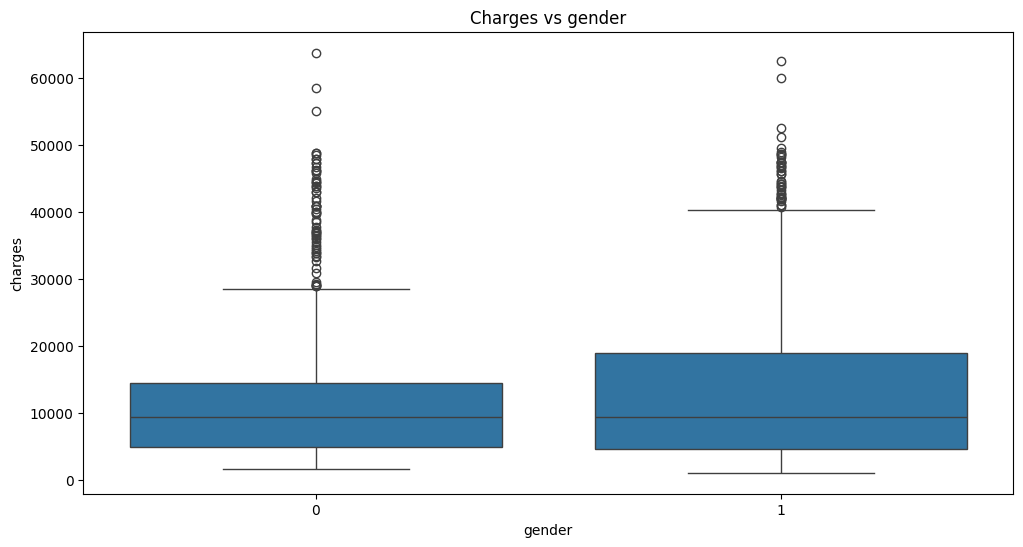

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="gender", y="charges", data=df)
plt.title("Charges vs gender")
plt.show()




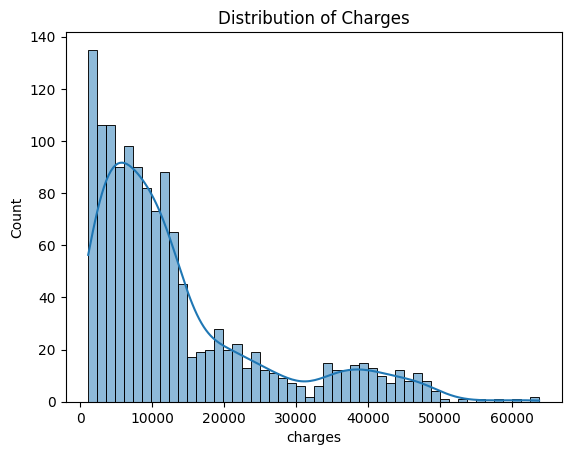

np.float64(1.5153909108403483)

In [ ]:
sns.histplot(df['charges'], bins=50, kde=True)
plt.title("Distribution of Charges")
plt.show()

# Check skewness numerically
df['charges'].skew()

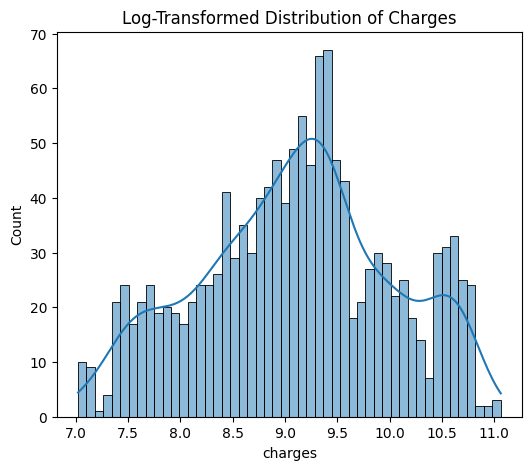

In [ ]:
# Log-transform the target
df['charges__'] = np.log1p(df['charges'])  # safer than log() for 0 values

# Plot transformed distribution
plt.figure(figsize=(6, 5))
sns.histplot(df['charges__'], bins=50, kde=True)
plt.title("Log-Transformed Distribution of Charges")
plt.xlabel("charges")
plt.show()

In [ ]:
df.drop('charges', axis=1, inplace=True)
df.rename(columns={'charges__': 'charges'}, inplace=True)

In [ ]:
df_cleaned = df.copy()

# Select numerical columns excluding 'charges'
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'charges' in numerical_cols:
    numerical_cols.remove('charges')

# Step 1: Compute Z-scores
z_scores = np.abs(zscore(df_cleaned[numerical_cols]))

# Step 2: Count outliers per column
outlier_counts = (z_scores > 3).sum(axis=0)
outlier_series = pd.Series(outlier_counts, index=numerical_cols)
print("Outlier counts per column:\n", outlier_series)


Outlier counts per column:
 age                  0
gender               0
bmi                  4
children            18
smoker               0
region_northeast     0
region_northwest     0
region_southeast     0
region_southwest     0
dtype: int64


#TRAIN TEST SPLIT

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def evaluate_model_fit(model, X_train, y_train, X_test, y_test, scaled=True, model_name="Model"):
    if scaled:
        train_pred = model.predict(X_train_scaled)
        test_pred = model.predict(X_test_scaled)
    else:
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    print(f"\n🔍 {model_name} - Fit Evaluation")
    print(f"Train R² : {train_r2:.4f}")
    print(f"Test  R² : {test_r2:.4f}")

    gap = train_r2 - test_r2
    if train_r2 < 0.6 and test_r2 < 0.6:
        print("❌ UNDERFITTING: model is too simple or missing features.")
    elif gap > 0.15:
        print("⚠️ OVERFITTING: model performs well on training but poorly on test data.")
    else:
        print("✅ GOOD FIT: model generalizes well.")
    print("-" * 40)

def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Empty list to store all model results
model_results = []

#LINEAR REGRESSION

Linear Regression
MAE : 0.2606564515736235
MSE : 0.15822472253428832
RMSE: 0.39777471329169267
R²  : 0.829478626133356
MAPE  : 0.028925924165020482

🔍 Linear Regression - Fit Evaluation
Train R² : 0.7497
Test  R² : 0.8295
✅ GOOD FIT: model generalizes well.
----------------------------------------


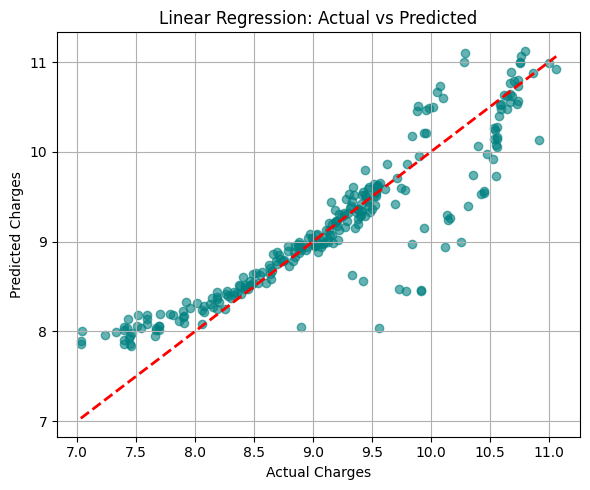

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)
evaluate_model_fit(lr, X_train, y_train, X_test, y_test, scaled=True, model_name="Linear Regression")
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")

model_results.append({
    'Model': 'Linear Regression',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
     'MAPE': round(mape, 4)
})


cv = KFold(n_splits=5, shuffle=True, random_state=42)

#RIDGE

In [ ]:
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=cv, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge Alpha:", ridge_grid.best_params_)


Best Ridge Alpha: {'alpha': 1.0}


Ridge Regression
MAE : 0.26085011000643266
MSE : 0.15830474134399253
RMSE: 0.39787528365556024
R²  : 0.829392388552102
MAPE  : 0.028925924165020482

🔍 Ridge Regression - Fit Evaluation
Train R² : 0.7497
Test  R² : 0.8294
✅ GOOD FIT: model generalizes well.
----------------------------------------


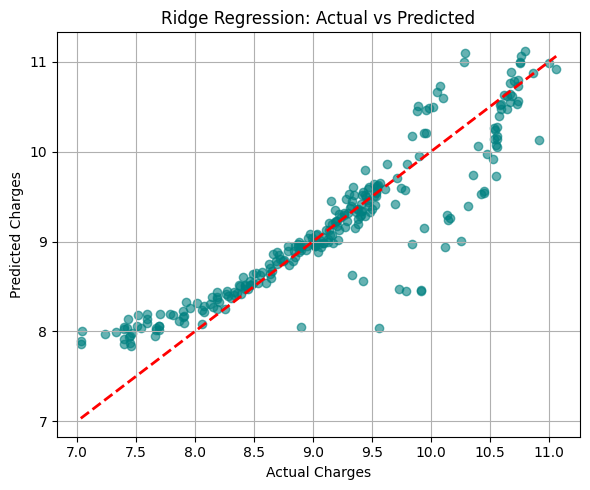

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)

print("Ridge Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(ridge, X_train, y_train, X_test, y_test, scaled=True, model_name="Ridge Regression")
plot_actual_vs_predicted(y_test, y_pred_ridge, "Ridge Regression: Actual vs Predicted")

model_results.append({
    'Model': 'Ridge Regression',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#LASSO

In [ ]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=cv, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
print("Best Lasso Alpha:", lasso_grid.best_params_)


Best Lasso Alpha: {'alpha': 0.001}


Lasso Regression
MAE : 0.2607893399615837
MSE : 0.1585671955563022
RMSE: 0.39820496676498424
R²  : 0.8291095373507011
MAPE  : 0.028925924165020482

🔍 Lasso Regression - Fit Evaluation
Train R² : 0.7496
Test  R² : 0.8291
✅ GOOD FIT: model generalizes well.
----------------------------------------


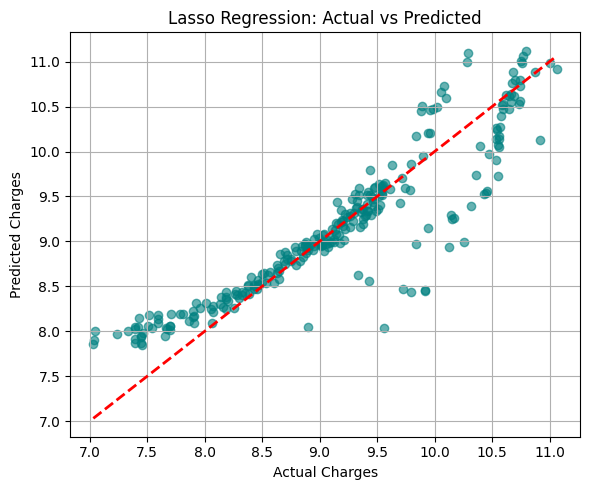

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)

print("Lasso Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(lasso, X_train, y_train, X_test, y_test, scaled=True, model_name="Lasso Regression")
plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso Regression: Actual vs Predicted")

model_results.append({
    'Model': 'Lasso Regression',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#SVR

In [ ]:
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
}
svr_grid = GridSearchCV(SVR(), svr_params, cv=cv, scoring='neg_mean_squared_error')
svr_grid.fit(X_train_scaled, y_train)
print("Best SVR Params:", svr_grid.best_params_)


Best SVR Params: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}


Support Vector Regression
MAE : 0.17622700352453288
MSE : 0.11733663145636157
RMSE: 0.34254434961966834
R²  : 0.8735443912913994
MAPE  : 0.028925924165020482

🔍 SVR - Fit Evaluation
Train R² : 0.8448
Test  R² : 0.8735
✅ GOOD FIT: model generalizes well.
----------------------------------------


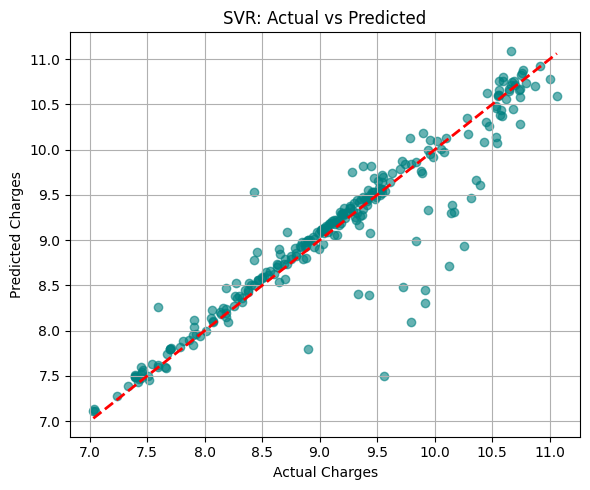

In [ ]:
from sklearn.svm import SVR

svr = SVR(C= 10, epsilon= 0.1,)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)

print("Support Vector Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(svr, X_train, y_train, X_test, y_test, scaled=True, model_name="SVR")
plot_actual_vs_predicted(y_test, y_pred_svr, "SVR: Actual vs Predicted")

model_results.append({
    'Model': 'SVR',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#KNN

In [ ]:
knn_params = {'n_neighbors': list(range(3, 21))}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=cv, scoring='neg_mean_squared_error')
knn_grid.fit(X_train_scaled, y_train)
print("Best KNN Neighbors:", knn_grid.best_params_)


Best KNN Neighbors: {'n_neighbors': 9}


KNN Regression
MAE : 0.2598992736753572
MSE : 0.14818833648308147
RMSE: 0.38495238209820376
R²  : 0.8402950036924124
MAPE  : 0.028925924165020482

🔍 KNN Regression - Fit Evaluation
Train R² : 0.8292
Test  R² : 0.8403
✅ GOOD FIT: model generalizes well.
----------------------------------------


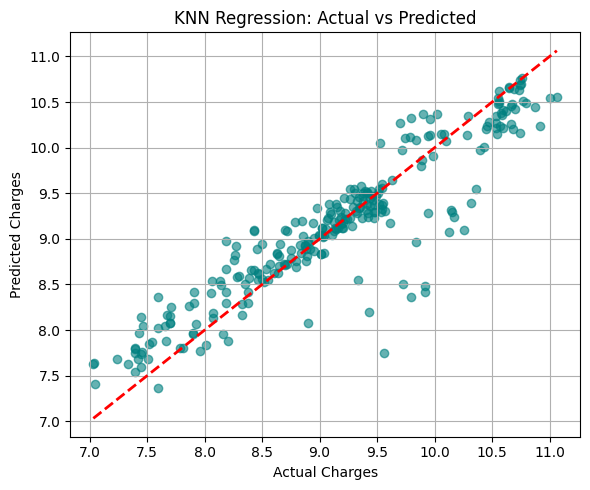

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors= 9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)

print("KNN Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(knn, X_train, y_train, X_test, y_test, scaled=True, model_name="KNN Regression")
plot_actual_vs_predicted(y_test, y_pred_knn, "KNN Regression: Actual vs Predicted")

model_results.append({
    'Model': 'KNN Regression',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#RANDOM FOREST

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=cv, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
print("Best RF Params:", rf_grid.best_params_)


Best RF Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Random Forest Regression
MAE : 0.18112554415317228
MSE : 0.11978361542167618
RMSE: 0.3460976963541887
R²  : 0.8709072366109438
MAPE  : 0.028925924165020482

🔍 Random Forest Regression - Fit Evaluation
Train R² : 0.9231
Test  R² : 0.8709
✅ GOOD FIT: model generalizes well.
----------------------------------------


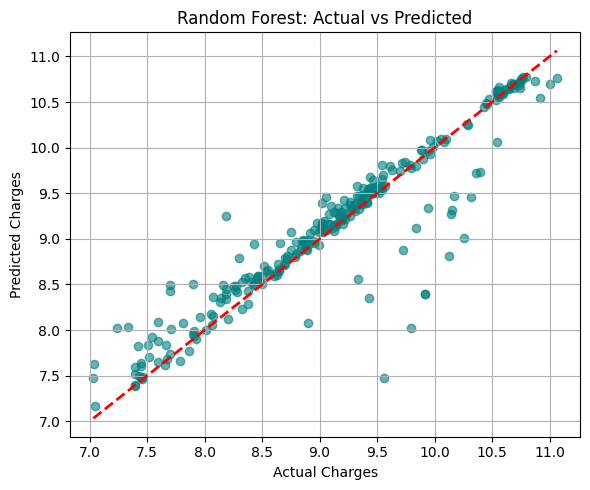

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,max_depth=10, min_samples_leaf=2, min_samples_split=5,random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)

print("Random Forest Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(rf, X_train, y_train, X_test, y_test, scaled=False, model_name="Random Forest Regression")
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest: Actual vs Predicted")

model_results.append({
    'Model': 'random forest',
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#GRADIENT BOOSTING

In [ ]:
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=cv, scoring='neg_mean_squared_error')
gbr_grid.fit(X_train, y_train)
print("Best GBR Params:", gbr_grid.best_params_)


Best GBR Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Gradient Boosting Regression
MAE : 0.18223239649676484
MSE : 0.10494905509138272
RMSE: 0.3239584156822951
R²  : 0.886894685144349
MAPE  : 0.028925924165020482

🔍 Gradient Boosting Regression - Fit Evaluation
Train R² : 0.8552
Test  R² : 0.8869
✅ GOOD FIT: model generalizes well.
----------------------------------------


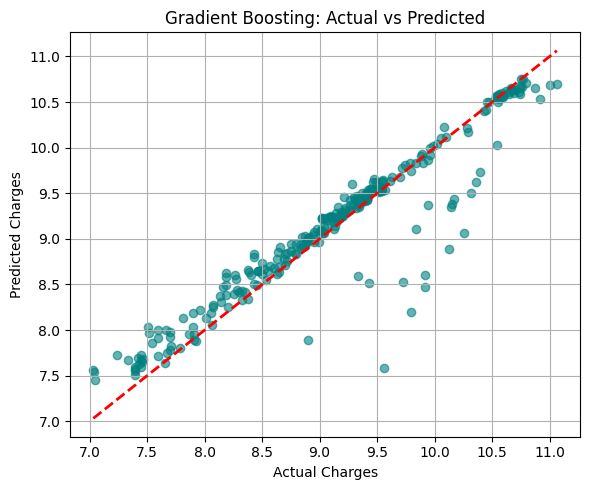

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42,learning_rate= 0.05, max_depth= 3, n_estimators= 100, subsample= 0.8)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
print("Gradient Boosting Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(gbr, X_train, y_train, X_test, y_test, scaled=False, model_name="Gradient Boosting Regression")
plot_actual_vs_predicted(y_test, y_pred_gbr, "Gradient Boosting: Actual vs Predicted")

model_results.append({
    'Model': 'gradient boosting',
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#XGB

In [ ]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_params, cv=cv, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)


Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


XGBoost Regression (Tuned)
MAE : 0.18078497851766773
MSE : 0.10617423580327043
RMSE: 0.3258438825622946
R²  : 0.8855742878329824
MAPE  : 0.028925924165020482

🔍 XGBoost Regression (Tuned) - Fit Evaluation
Train R² : 0.8664
Test  R² : 0.8856
✅ GOOD FIT: model generalizes well.
----------------------------------------


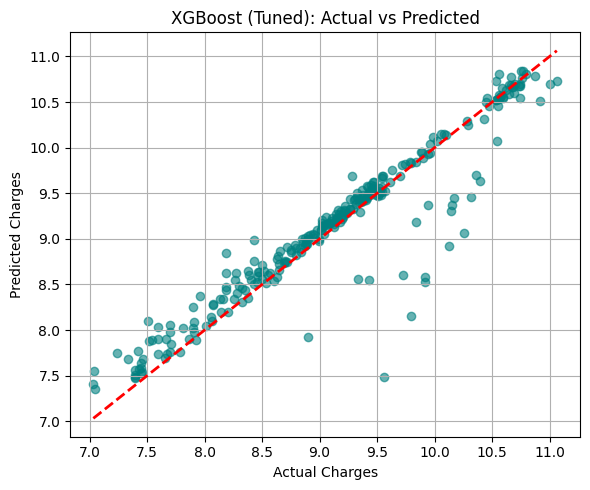

In [ ]:
from xgboost import XGBRegressor

# A simpler, better-controlled model
xgb = XGBRegressor(
    n_estimators=200,       # number of trees (200 is safer)
    learning_rate=0.05,     # smaller step size (0.05 is safer)
    max_depth=3,            # shallower trees → less overfit
    subsample=0.8,          # use 80% of rows per tree
    colsample_bytree=0.8,   # use 80% of columns per tree
    reg_alpha=0.5,          # add L1 regularization
    reg_lambda=0.5,         # add L2 regularization
    random_state=42,
    verbosity=0
)

xgb.fit(X_train, y_train)  # train it

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)

print("XGBoost Regression (Tuned)")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)
print("MAPE  :", mape)

evaluate_model_fit(xgb, X_train, y_train, X_test, y_test, scaled=False, model_name="XGBoost Regression (Tuned)")
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost (Tuned): Actual vs Predicted")

model_results.append({
    'Model': 'XGBoost',
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4),
    'MAPE': round(mape, 4)
})

#COMPARISON TABLE

In [ ]:
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='RMSE')  # Sort by best RMSE
display(results_df)

,Model,MAE,MSE,RMSE,R2,MAPE
6,gradient boosting,0.1822,0.1049,0.3240,0.8869,0.0289
7,XGBoost,0.1808,0.1062,0.3258,0.8856,0.0289
3,SVR,0.1762,0.1173,0.3425,0.8735,0.0289
5,random forest,0.1811,0.1198,0.3461,0.8709,0.0289
4,KNN Regression,0.2599,0.1482,0.3850,0.8403,0.0289
0,Linear Regression,0.2607,0.1582,0.3978,0.8295,0.0289
1,Ridge Regression,0.2609,0.1583,0.3979,0.8294,0.0289
2,Lasso Regression,0.2608,0.1586,0.3982,0.8291,0.0289


#VIF

In [ ]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


            feature        VIF
0               age   1.016794
1            gender   1.008944
2               bmi   1.106742
3          children   1.004017
4            smoker   1.012100
5  region_northeast   8.603955
6  region_northwest   8.617019
7  region_southeast  11.535961
8  region_southwest   9.219311


In [ ]:
X.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
print (y)

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1337, dtype: float64


In [ ]:
X=X.drop(['region_southeast'],axis=1)




In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature       VIF
0               age  7.997241
1            gender  2.008500
2               bmi  9.246761
3          children  1.815142
4            smoker  1.259015
5  region_northeast  1.689751
6  region_northwest  1.696869
7  region_southwest  1.734662


In [ ]:
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression
MAE : 0.2606564515736235
MSE : 0.1582247225342883
RMSE: 0.39777471329169267
R²  : 0.829478626133356

🔍 Linear Regression - Fit Evaluation
Train R² : 0.7497
Test  R² : 0.8295
✅ GOOD FIT: model generalizes well.
----------------------------------------


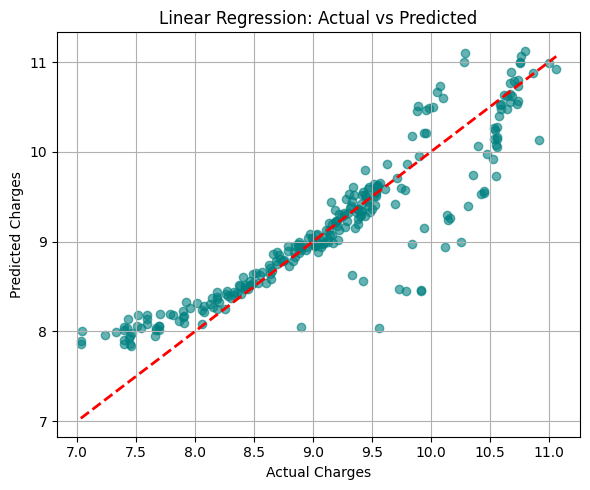

In [ ]:
model_results_vif = []
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

evaluate_model_fit(lr, X_train, y_train, X_test, y_test, scaled=True, model_name="Linear Regression")
plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted")

model_results_vif.append({
    'Model': 'Linear Regression',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4)
})


cv = KFold(n_splits=5, shuffle=True, random_state=42)

Support Vector Regression
MAE : 0.18190165613140682
MSE : 0.12110845505836676
RMSE: 0.34800640088706236
R²  : 0.8694794352447412

🔍 SVR - Fit Evaluation
Train R² : 0.8461
Test  R² : 0.8695
✅ GOOD FIT: model generalizes well.
----------------------------------------


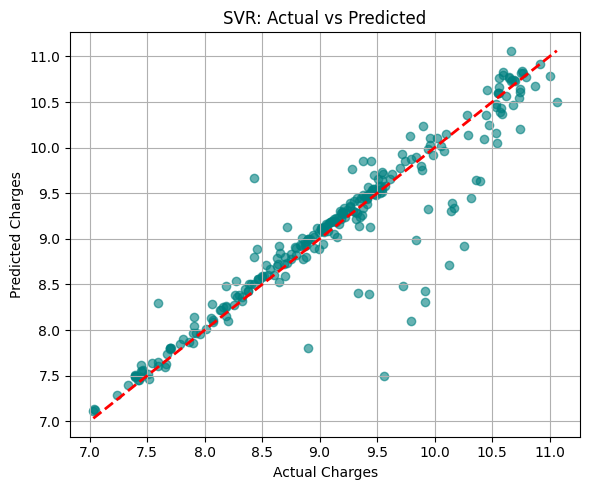

In [ ]:
from sklearn.svm import SVR

svr = SVR(C= 10, epsilon= 0.1,)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print("Support Vector Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

evaluate_model_fit(svr, X_train, y_train, X_test, y_test, scaled=True, model_name="SVR")
plot_actual_vs_predicted(y_test, y_pred_svr, "SVR: Actual vs Predicted")

model_results_vif.append({
    'Model': 'SVR',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4)
})

KNN Regression
MAE : 0.25908858683988817
MSE : 0.1478712348901599
RMSE: 0.3845402903340038
R²  : 0.8406367492705635

🔍 KNN Regression - Fit Evaluation
Train R² : 0.8293
Test  R² : 0.8406
✅ GOOD FIT: model generalizes well.
----------------------------------------


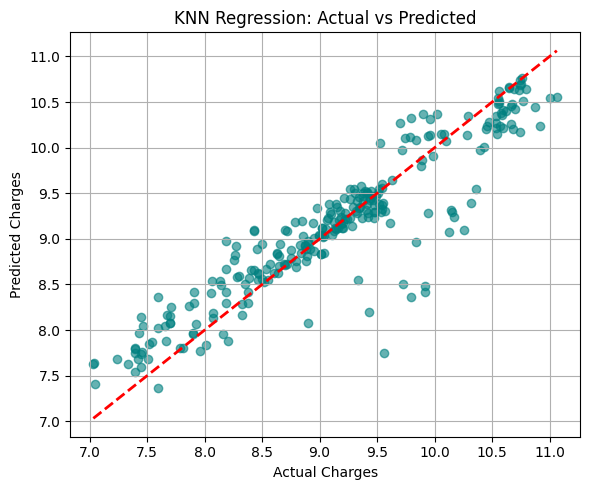

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors= 9)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)

print("KNN Regression")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

evaluate_model_fit(knn, X_train, y_train, X_test, y_test, scaled=True, model_name="KNN Regression")
plot_actual_vs_predicted(y_test, y_pred_knn, "KNN Regression: Actual vs Predicted")

model_results_vif.append({
    'Model': 'KNN Regression',   # <- Change name for each model
    'MAE': round(mae, 4),
    'MSE': round(mse, 4),
    'RMSE': round(rmse, 4),
    'R2': round(r2, 4)
})




#VIF COMPARISION

In [ ]:
results_df_vif = pd.DataFrame(model_results_vif)
results_df_vif = results_df_vif.sort_values(by='RMSE')  # Sort by best RMSE
display(results_df_vif)

,Model,MAE,MSE,RMSE,R2
1,SVR,0.1819,0.1211,0.3480,0.8695
2,KNN Regression,0.2591,0.1479,0.3845,0.8406
0,Linear Regression,0.2607,0.1582,0.3978,0.8295


#ANN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# ==== ANN Architectures ====
def build_model_1(input_dim):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dense(1)
    ])
    return model

def build_model_2(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_model_3(input_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_model_4(input_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.2),               # reduced dropout
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),  # added stabilizing layer
        layers.Dense(1)
    ])
    return model

def build_model_5(input_dim):
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),   # added dropout to avoid overfitting
        layers.Dense(128, activation='relu'),
        layers.Dense(1)
    ])
    return model


# ==== EarlyStopping ====
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,                  # give models more chance to converge
    restore_best_weights=True
)

# ==== Train & Evaluate ====
models = {
    "ANN_1": build_model_1(X_train.shape[1]),
    "ANN_2": build_model_2(X_train.shape[1]),
    "ANN_3": build_model_3(X_train.shape[1]),
    "ANN_4": build_model_4(X_train.shape[1]),
    "ANN_5": build_model_5(X_train.shape[1])
}

results = []

for name, model in models.items():
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),  # fixed LR
        loss='mse',
        metrics=['mae']
    )

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=300, batch_size=32,    # more epochs, early stopping handles cut-off
        callbacks=[early_stop],
        verbose=0
    )

    y_pred = model.predict(X_test).flatten()

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2,"MAPE": mape,"MSE":mse})

results = pd.DataFrame(results)
print(results)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
   Model       MAE      RMSE        R2      MAPE       MSE
0  ANN_1  0.211992  0.337779  0.877038  0.022859  0.114095
1  ANN_2  0.215035  0.347196  0.870087  0.023166  0.120545
2  ANN_3  0.208305  0.354067  0.864893  0.022316  0.125364
3  ANN_4  0.412179  0.552356  0.671192  0.045099  0.305097
4  ANN_5  0.638440  0.737398  0.413985  0.068404  0.543756


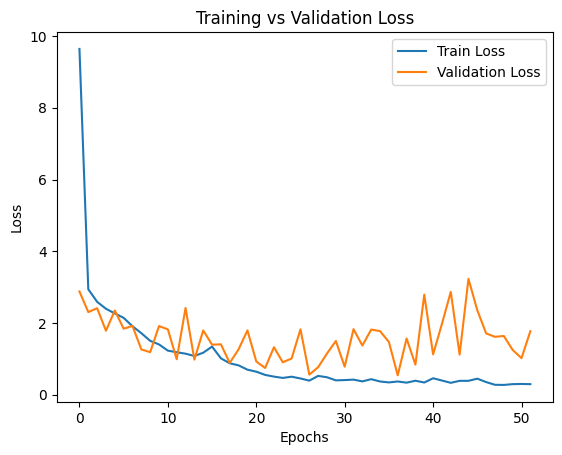

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [ ]:
# Make sure ANN results are appended
comparison = pd.concat([results_df,results], ignore_index=True)

# Check if ANN got added
print(comparison)



                Model       MAE       MSE      RMSE        R2      MAPE
0   gradient boosting  0.182200  0.104900  0.324000  0.886900  0.028900
1             XGBoost  0.180800  0.106200  0.325800  0.885600  0.028900
2                 SVR  0.176200  0.117300  0.342500  0.873500  0.028900
3       random forest  0.181100  0.119800  0.346100  0.870900  0.028900
4      KNN Regression  0.259900  0.148200  0.385000  0.840300  0.028900
5   Linear Regression  0.260700  0.158200  0.397800  0.829500  0.028900
6    Ridge Regression  0.260900  0.158300  0.397900  0.829400  0.028900
7    Lasso Regression  0.260800  0.158600  0.398200  0.829100  0.028900
8               ANN_1  0.211992  0.114095  0.337779  0.877038  0.022859
9               ANN_2  0.215035  0.120545  0.347196  0.870087  0.023166
10              ANN_3  0.208305  0.125364  0.354067  0.864893  0.022316
11              ANN_4  0.412179  0.305097  0.552356  0.671192  0.045099
12              ANN_5  0.638440  0.543756  0.737398  0.413985  0

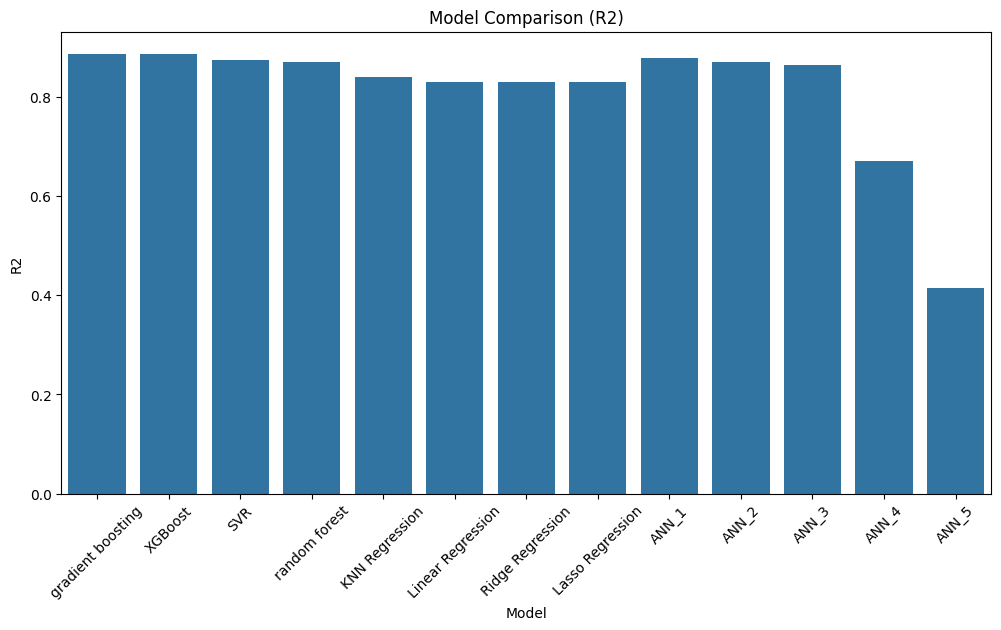

In [ ]:
# Plot again
plt.figure(figsize=(12,6))
sns.barplot(data=comparison, x="Model", y="R2")
plt.title("Model Comparison (R2)")
plt.xticks(rotation=45)
plt.show()


#DIFFERENT TRAIN TEST SPLIT RATIO

In [ ]:


# ========== Best ANN ==========
def build_best_ann(input_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ========== Models ==========
def get_models():
    return {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNN": KNeighborsRegressor(),
        "SVR": SVR(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=0)
    }

# ========== Evaluation ==========
def evaluate_model(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred)
    }

# ========== Run for different splits ==========
splits = [0.25, 0.30, 0.35]
all_results = []

for test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    models = get_models()

    # ---- ML Models ----
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        metrics = evaluate_model(y_test, y_pred)
        metrics["Model"] = name
        metrics["Test_Size"] = f"{int((1-test_size)*100)}-{int(test_size*100)}"
        all_results.append(metrics)

    # ---- Best ANN ----
    ann = build_best_ann(X_train.shape[1])
    ann.compile(optimizer='adam', loss='mse', metrics=['mae'])
    ann.fit(X_train, y_train,
            validation_split=0.2,
            epochs=200, batch_size=32,
            callbacks=[early_stop],
            verbose=0)

    y_pred_ann = ann.predict(X_test).flatten()
    metrics = evaluate_model(y_test, y_pred_ann)
    metrics["Model"] = "Best ANN"
    metrics["Test_Size"] = f"{int((1-test_size)*100)}-{int(test_size*100)}"
    all_results.append(metrics)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
# Show results separately for each test split
for split in results_df["Test_Size"].unique():
    print(f"\n===== Results for Test Size {split} =====")
    df_split = results_df[results_df["Test_Size"] == split].drop(columns="Test_Size")
    print(df_split.to_string(index=False, float_format="%.4f"))





===== Results for Test Size 75-25 =====
   MAE   RMSE     R2   MAPE    MSE             Model
0.2576 0.3979 0.8238 0.0286 0.1583 Linear Regression
0.2582 0.3981 0.8236 0.0287 0.1585             Ridge
0.6220 0.7851 0.3140 0.0682 0.6164             Lasso
0.5170 0.7168 0.4283 0.0552 0.5137               KNN
0.4464 0.7563 0.3634 0.0453 0.5720               SVR
0.1930 0.3765 0.8422 0.0216 0.1418     Random Forest
0.1901 0.3387 0.8723 0.0211 0.1148 Gradient Boosting
0.2388 0.4338 0.7906 0.0269 0.1882           XGBoost
0.2068 0.3491 0.8643 0.0220 0.1219          Best ANN

===== Results for Test Size 70-30 =====
   MAE   RMSE     R2   MAPE    MSE             Model
0.2655 0.4286 0.7911 0.0292 0.1837 Linear Regression
0.2660 0.4288 0.7910 0.0292 0.1839             Ridge
0.6206 0.7880 0.2941 0.0679 0.6209             Lasso
0.5347 0.7456 0.3680 0.0571 0.5559               KNN
0.4561 0.7763 0.3148 0.0463 0.6027               SVR
0.1938 0.3904 0.8267 0.0212 0.1524     Random Forest
0.1927 0.3687 0.8